In [617]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import matplotlib.pyplot as plt
  
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

df = pd.concat([X, y], axis=1)
print("numbers:", len(df))
df.head(10)

numbers: 4177


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [618]:
df['Rings'] = pd.to_numeric(df['Rings'])
# One-hot encode the 'Sex' column
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

for column in df.select_dtypes('number').columns:
    if df[column].mean() < 1.0:
        df[column] = df[column] * 20

df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,10.479842,8.157625,2.790328,16.574843,7.187350,3.611872,4.776617,9.933684
std,2.401858,1.984797,0.836541,9.807780,4.439259,2.192285,2.784053,3.224169
min,1.500000,1.100000,0.000000,0.040000,0.020000,0.010000,0.030000,1.000000
25%,9.000000,7.000000,2.300000,8.830000,3.720000,1.870000,2.600000,8.000000
50%,10.900000,8.500000,2.800000,15.990000,6.720000,3.420000,4.680000,9.000000
75%,12.300000,9.600000,3.300000,23.060000,10.040000,5.060000,6.580000,11.000000
max,16.300000,13.000000,22.600000,56.510000,29.760000,15.200000,20.100000,29.000000


Length               Axes(0.125,0.53;0.133621x0.35)
Diameter          Axes(0.285345,0.53;0.133621x0.35)
Height             Axes(0.44569,0.53;0.133621x0.35)
Whole_weight      Axes(0.606034,0.53;0.133621x0.35)
Shucked_weight    Axes(0.766379,0.53;0.133621x0.35)
Viscera_weight       Axes(0.125,0.11;0.133621x0.35)
Shell_weight      Axes(0.285345,0.11;0.133621x0.35)
Rings              Axes(0.44569,0.11;0.133621x0.35)
dtype: object

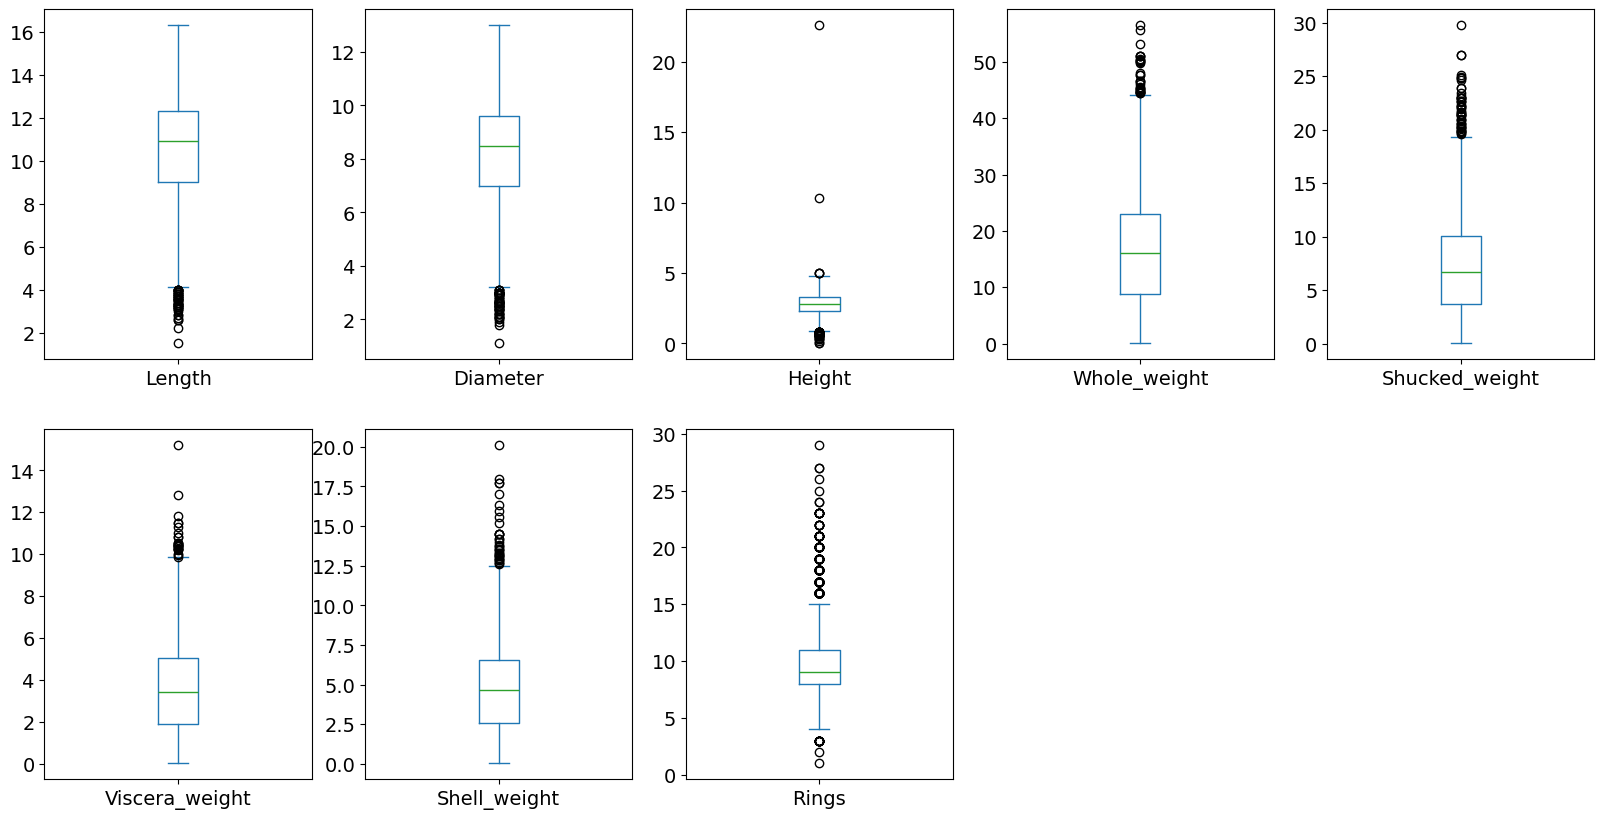

In [619]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(2,5), sharex=False, 
sharey=False, fontsize=14, figsize=(20,10))

In [620]:
from sklearn.linear_model import LinearRegression

# Filter out rows where Height is 0 (these are the outliers)
train_data = df[df['Height'] != 0]
outliers_data = df[df['Height'] == 0]

# Prepare the data
X_train = train_data[['Length']]
y_train = train_data['Height']

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict heights for rows where Height == 0
X_outliers = outliers_data[['Length']]
df.loc[df['Height'] == 0, 'Height'] = model.predict(X_outliers)

In [621]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Height'
Q1 = df['Height'].quantile(0.25)
Q3 = df['Height'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]

# Print outliers
print("Outliers in 'Height':")
print(outliers)

# Step 4: Handling outliers by capping
# Remove infant whose height larger than upper bound, non-infant smaller than lower bound
df = df[~((df['Height'] > upper_bound) & (df['Sex_I'] == True))]
df = df[~((df['Height'] < lower_bound) & (df['Sex_I'] == False))]
#df['Height'] = df['Length'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


Outliers in 'Height':
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
174      4.7       3.2     0.8          0.96            0.37            0.36   
236      1.5       1.1     0.2          0.04            0.02            0.01   
237      2.6       2.0     0.6          0.26            0.09            0.06   
238      2.2       1.8     0.6          0.16            0.05            0.04   
239      3.2       2.4     0.7          0.42            0.15            0.09   
306      3.3       2.4     0.6          0.43            0.14            0.10   
321      3.8       2.9     0.8          0.76            0.33            0.13   
333      4.7       3.5     0.8          1.41            0.67            0.30   
525      3.5       2.5     0.8          0.48            0.19            0.12   
526      3.1       2.2     0.8          0.31            0.13            0.06   
694      3.3       2.2     0.4          0.38            0.13            0.05   
718      3.6      

In [622]:
# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Height'
Q1 = df['Length'].quantile(0.25)
Q3 = df['Length'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = df[(df['Length'] < lower_bound) | (df['Length'] > upper_bound)]

# Print outliers
print("Outliers in 'Length':")
print(outliers)

Outliers in 'Length':
      Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
148      3.5       2.6     1.1          0.63            0.21            0.13   
149      3.4       2.6     1.9          0.60            0.26            0.16   
236      1.5       1.1     0.2          0.04            0.02            0.01   
237      2.6       2.0     0.6          0.26            0.09            0.06   
238      2.2       1.8     0.6          0.16            0.05            0.04   
239      3.2       2.4     0.7          0.42            0.15            0.09   
305      4.0       2.9     1.2          0.74            0.25            0.19   
306      3.3       2.4     0.6          0.43            0.14            0.10   
321      3.8       2.9     0.8          0.76            0.33            0.13   
465      3.5       2.5     1.0          0.47            0.16            0.07   
523      4.0       2.8     1.1          0.70            0.29            0.16   
611      3.9      

In [623]:
df['Shucked_weight_ratio'] = df['Shucked_weight'] / (df['Whole_weight'] + 1)
df['Viscera_weight_ratio'] = df['Viscera_weight'] / (df['Whole_weight'] + 1)
df['Shell_weight_ratio'] = df['Shell_weight'] / (df['Whole_weight'] + 1)



# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Shell_weight'
lower_bound = 0.10
upper_bound = 0.80

# Step 3: Identify outliers
outliers_shell_weight = df[(df['Shell_weight_ratio'] < lower_bound) | (df['Shell_weight_ratio'] > upper_bound)]
outliers_shucked_weight = df[(df['Shucked_weight_ratio'] < lower_bound) | (df['Shucked_weight_ratio'] > upper_bound)]

# Print outliers
print(outliers_shell_weight)
print(outliers_shucked_weight)


# Step 4: Handling outliers by capping
df['Shucked_weight_ratio'] = df['Shucked_weight_ratio'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
df['Shell_weight_ratio'] = df['Shell_weight_ratio'].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

      Length  Diameter    Height  Whole_weight  Shucked_weight  \
236      1.5       1.1  0.200000          0.04            0.02   
237      2.6       2.0  0.600000          0.26            0.09   
238      2.2       1.8  0.600000          0.16            0.05   
239      3.2       2.4  0.700000          0.42            0.15   
306      3.3       2.4  0.600000          0.43            0.14   
694      3.3       2.2  0.400000          0.38            0.13   
696      3.1       2.1  1.000000          0.35            0.10   
719      3.0       2.0  0.500000          0.30            0.09   
720      3.2       2.2  0.500000          0.36            0.13   
1056     4.0       3.1  0.800000          0.87            0.31   
1429     2.8       2.1  0.700000          0.28            0.11   
1987     3.2       2.2  0.500000          0.39            0.15   
2114     2.6       1.9  0.700000          0.21            0.10   
2169     3.3       2.3  0.300000          0.29            0.11   
3143     4

In [624]:
# drop
df = df.drop(columns=['Shucked_weight'])
df = df.drop(columns=['Viscera_weight'])
df = df.drop(columns=['Shell_weight'])

In [625]:
df['volume'] = (1/6) * np.pi * df['Length'] * df['Diameter'] * df['Height'] / 100
df = df.drop(columns=['Length','Diameter','Height'])

Whole_weight               Axes(0.125,0.53;0.133621x0.35)
Rings                   Axes(0.285345,0.53;0.133621x0.35)
Shucked_weight_ratio     Axes(0.44569,0.53;0.133621x0.35)
Viscera_weight_ratio    Axes(0.606034,0.53;0.133621x0.35)
Shell_weight_ratio      Axes(0.766379,0.53;0.133621x0.35)
volume                     Axes(0.125,0.11;0.133621x0.35)
dtype: object

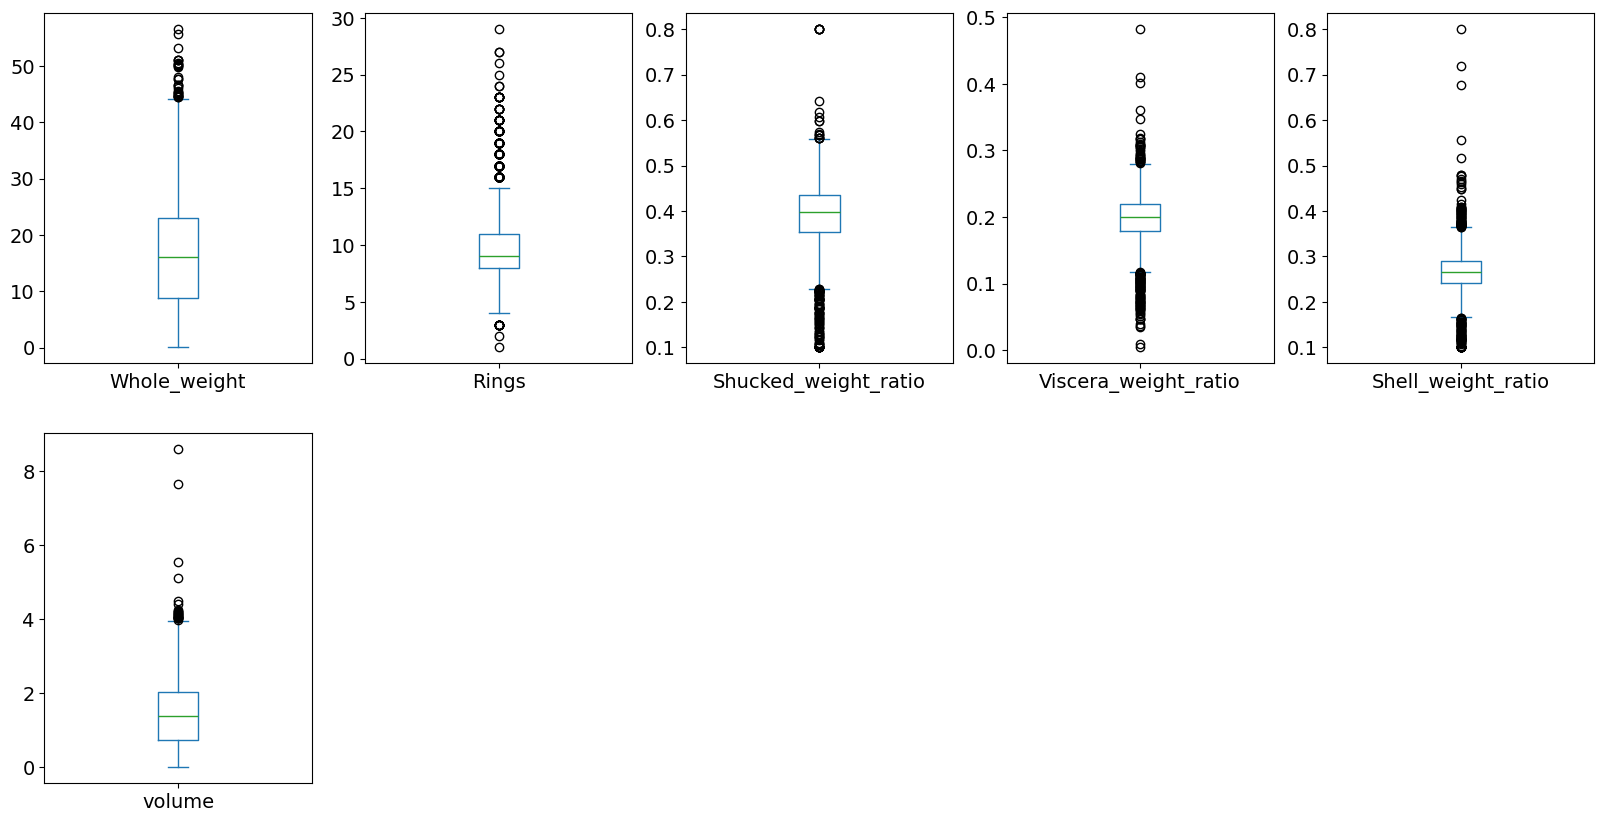

In [626]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(2,5), sharex=False, 
sharey=False, fontsize=14, figsize=(20,10))

In [627]:
from sklearn.preprocessing import MinMaxScaler

exclude_columns = ['Sex_F', 'Sex_I', 'Sex_M', 'Rings']

# Separate columns to scale and those to exclude
columns_to_scale = df.columns.difference(exclude_columns)
scaler = MinMaxScaler()

# Apply scaling only to selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df.head(10)
df.describe()

,Whole_weight,Rings,Shucked_weight_ratio,Viscera_weight_ratio,Shell_weight_ratio,volume
count,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000,4171.000000
mean,0.293122,9.940782,0.415545,0.404809,0.238059,0.169321
std,0.173516,3.220229,0.098438,0.074751,0.066155,0.102993
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.156012,8.000000,0.361812,0.364928,0.201128,0.087329
50%,0.282628,9.000000,0.424812,0.408517,0.236676,0.160143
75%,0.407827,11.000000,0.479903,0.450351,0.272451,0.237810
max,1.000000,29.000000,1.000000,1.000000,1.000000,1.000000


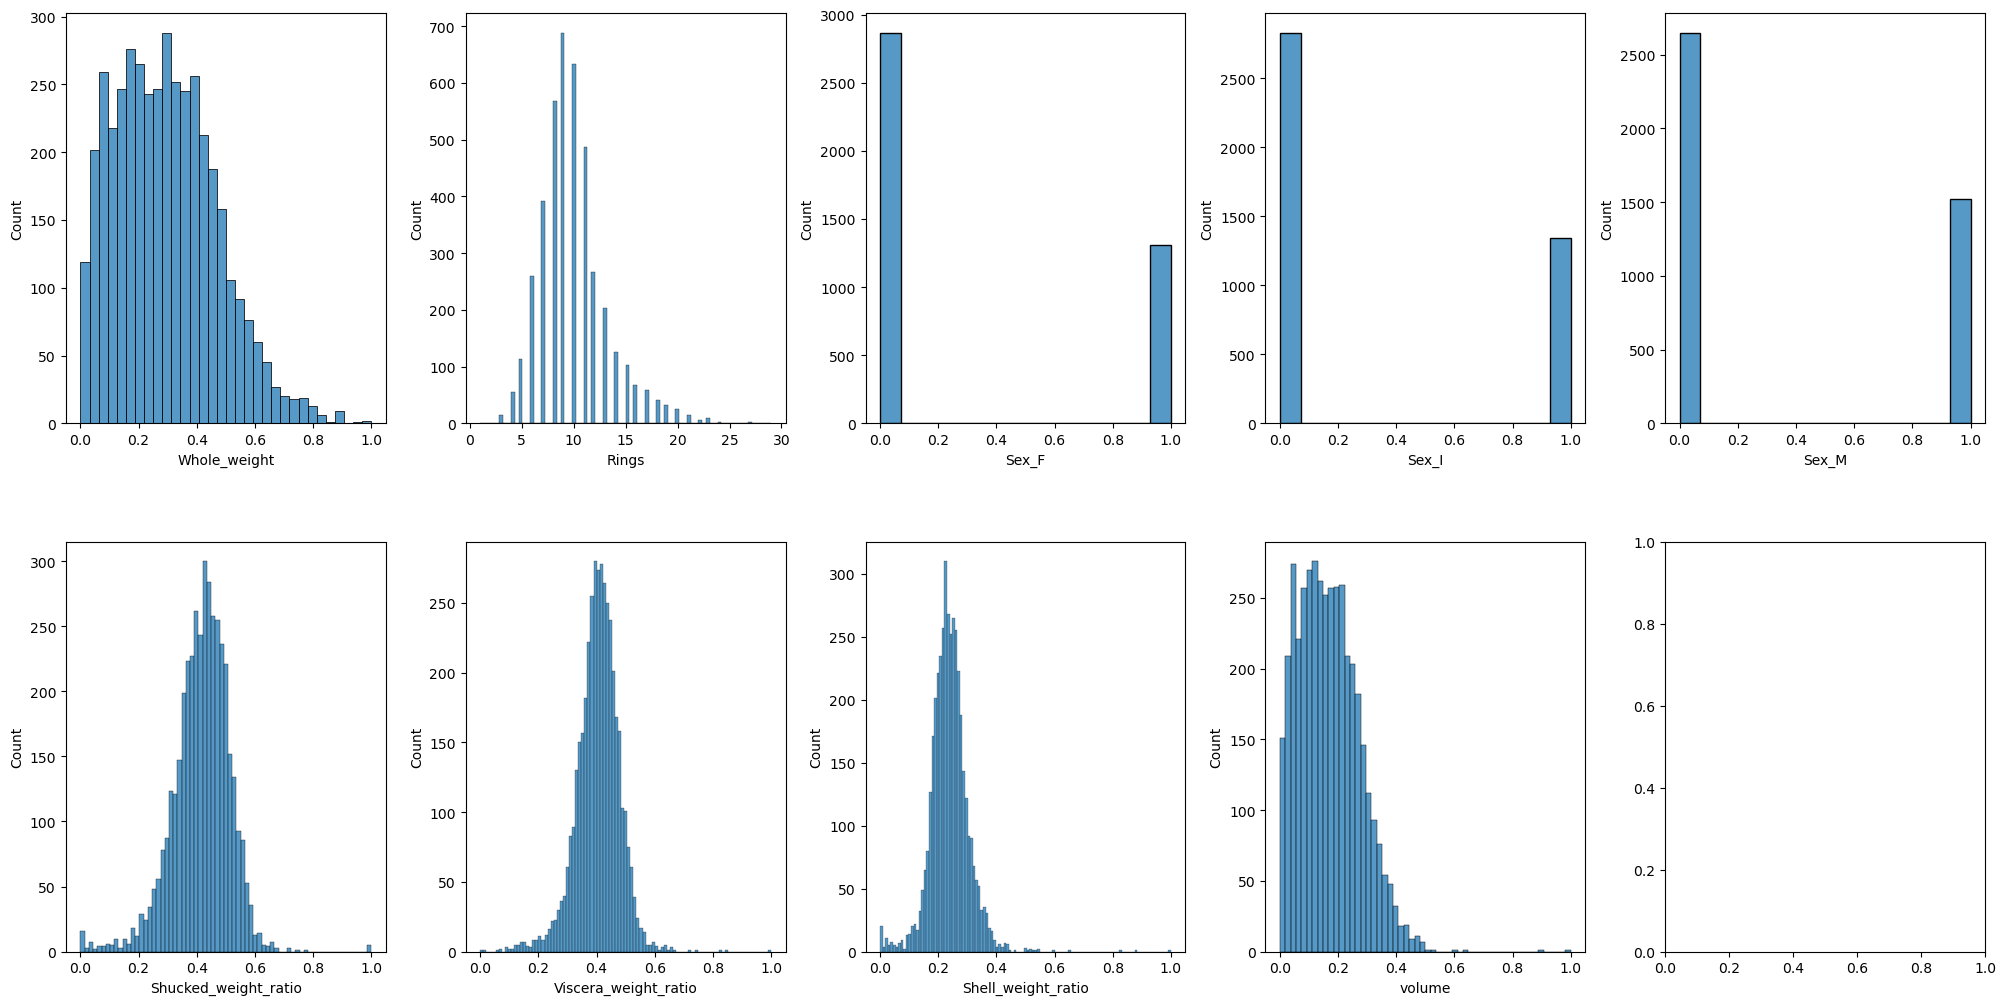

In [628]:
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.histplot(value, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


<Axes: title={'center': 'Abalone Regression'}>

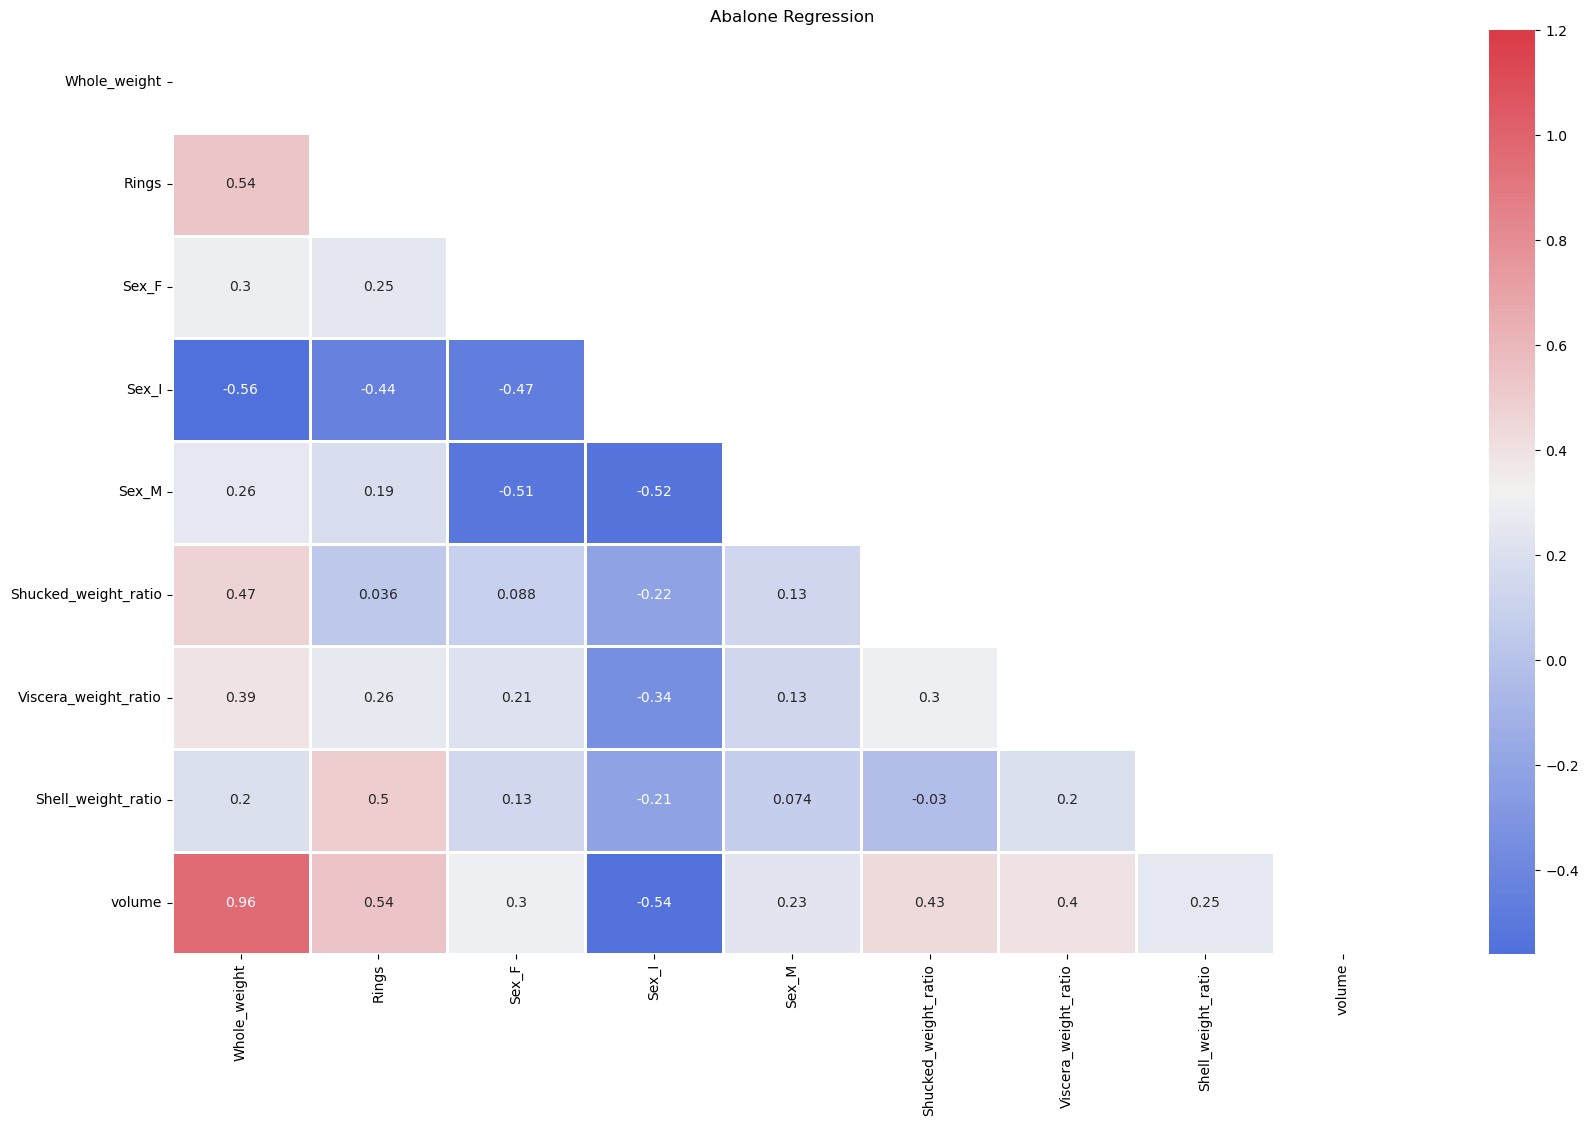

In [629]:


corrMatt = df.corr(numeric_only=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Abalone Regression')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1)

In [630]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression

def classify(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(X_train, y_train)
    print("Accuracy:", model.score(X_test, y_test) * 100, "%")
    
    y_pred = model.predict(X)
    # calculate MSE
    mse = root_mean_squared_error(y, y_pred)
    print("Mean Squared Error:", mse)


def cross_validation():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)
    print(scores)
    avg = (100 * np.mean(scores), 100 * np.std(scores)/np.sqrt(scores.shape[0]))
    print("Average score and standard deviation: (%.4f +- %.5f)%%" %avg)

In [631]:
from sklearn.svm import SVR

X, y = df.drop(columns=['Rings']), df['Rings'] 

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=4, epsilon=0.1, coef0=1)
lreg = LinearRegression()


classify(svr_rbf,X,y)
classify(svr_lin,X,y)
classify(svr_poly,X,y)
classify(lreg, X, y)


Accuracy: 56.23510407477408 %
Mean Squared Error: 2.1844171794092047
Accuracy: 47.900320623947614 %
Mean Squared Error: 2.352081919076871
Accuracy: 56.2680645748356 %
Mean Squared Error: 2.161124392956352
Accuracy: 51.76524481715894 %
Mean Squared Error: 2.2835283572258285
